In [3]:
import pandas as pd
import missingno as msno
from numpy.core.multiarray import result_type
import numpy as np



In [2]:
# Read the data
#iex_2015 = pd.read_csv('/home/freitas/Downloads/internet2/data/IDEGES_2016.csv',decimal=',', sep='|', encoding='latin-1')
#print(iex_2015.columns)
#iex_2015

Index(['AN_EXERCICIO', 'ST_ATUALIZADA', 'VL_PAGO', 'SALUM', 'SALAA',
       'QTDE_PC_APROVADAS', 'QTDE_PC_APROVADAS_RESSALVA', 'QTDE_OPC', 'VTD',
       'VTE', 'IAD', 'IEX', 'IRPC', 'CNPJ', 'NO_RAZAO_SOCIAL',
       'CO_MUNICIPIO_IBGE', 'NO_MUNICIPIO', 'SG_UF', 'IDEGES'],
      dtype='object')


,AN_EXERCICIO,ST_ATUALIZADA,VL_PAGO,SALUM,SALAA,QTDE_PC_APROVADAS,QTDE_PC_APROVADAS_RESSALVA,QTDE_OPC,VTD,VTE,IAD,IEX,IRPC,CNPJ,NO_RAZAO_SOCIAL,CO_MUNICIPIO_IBGE,NO_MUNICIPIO,SG_UF,IDEGES
0,2016,1,327180.0,363925.15,394831.49,0,0,0,722011.49,358086.34,10,4.959566,0.0,4033254000167,SECRETARIA DE EDUCACAO DO ESTADO DO ACRE,1200401,RIO BRANCO,AC,4.986522
1,2016,1,34920.0,17478.12,80.95,0,0,0,35000.95,17522.83,10,5.006387,0.0,4045993000179,PREF MUN DE ASSIS BRASIL,1200054,ASSIS BRASIL,AC,5.002129
2,2016,1,0.0,0.00,20.53,0,0,0,20.53,20.53,10,10.000000,0.0,4508933000145,PREF MUN DE BRASILEIA,1200104,BRASILEIA,AC,6.666667
3,2016,1,12840.0,0.00,0.00,0,0,0,12840.00,12840.00,10,10.000000,0.0,4012548000102,PREF MUN DE CRUZEIRO DO SUL,1200203,CRUZEIRO DO SUL,AC,6.666667
4,2016,1,3300.0,1774.84,37973.99,0,0,0,41273.99,39499.15,10,9.569986,0.0,4005179000120,PREF MUN DE FEIJO,1200302,FEIJO,AC,6.523329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,2016,1,8980.0,4509.89,40.68,1,0,1,9020.68,4510.79,10,5.000499,10.0,18382268000109,CPM DA EM DE EDUCAO INF DO COMPLEXO ESCOLAR MA...,4322400,URUGUAIANA,RS,8.333500
131887,2016,1,3000.0,1501.02,0.00,1,0,1,3000.00,1498.98,10,4.996600,10.0,18382330000154,ASSOC DO CIRCULO DE PAIS E MESTRES DA EMEI P...,4302154,BOA VISTA DAS MISSOES,RS,8.332200
131888,2016,1,3300.0,1650.00,60.92,1,0,1,3360.92,1710.92,10,5.090630,10.0,17964207000189,ASSOCIACAO DE PAIS E AMIGOS DA EMEI SONHO MEU,4318481,SAO JOSE DO HORTENCIO,RS,8.363543
131889,2016,1,1740.0,870.96,0.00,1,0,1,1740.00,869.04,10,4.994483,10.0,21249243000138,ASSOCIACAO CIRCULO DE PAIS E MESTRES DA EMEI ...,4314423,PICADA CAFE,RS,8.331494


In [4]:
# read tha data in many file and merge it in one dictionary
filemainpath = "/home/freitas/Downloads/internet2/data/"
keep = ['CNPJ','AN_EXERCICIO','IEX']
df = {}
# for year in range(2015, 2020):
#     filename = f'iex_inep_{year}.CSV'
#     df['iex_'+str(year)] = pd.read_csv(filemainpath + filename, sep=',', encoding='latin1')
#     df['iex_'+str(year)] = df['iex_'+str(year)][keep]
#     df['iex_'+str(year)].rename(columns={'AN_EXERCICIO':'ANO'}, inplace=True)
#     df['iex'+str(year)] = df['iex_'+str(year)].dropna()
#     df['iex'+str(year)] = df['iex'+str(year)].drop_duplicates()
#     print({year},df['iex_'+str(year)].shape)
# for year in range(2020,2022):
#     filename = f'iex_inep_{year}.CSV'
#     df['iex_'+str(year)] = pd.read_csv(filemainpath + filename, sep=';', encoding='latin1')
#     df['iex_'+str(year)] = df['iex_'+str(year)][keep]
#     df['iex_'+str(year)].rename(columns={'AN_EXERCICIO':'ANO'}, inplace=True)
#     print({year},df['iex_'+str(year)].shape)
for year in range(2015, 2022):
    filename = f'IDEGES_{year}.csv'
    df['iex_'+str(year)] = pd.read_csv(filemainpath + filename, decimal=',', sep='|', encoding='latin-1')
    df['iex_'+str(year)] = df['iex_'+str(year)][keep]
    df['iex_'+str(year)].rename(columns={'AN_EXERCICIO':'ANO'}, inplace=True)
    df['iex_'+str(year)] = df['iex_'+str(year)].dropna()
    df['iex_'+str(year)] = df['iex_'+str(year)].drop_duplicates()
    print({year},df['iex_'+str(year)].shape)
# for year in range(2020,2022):
#     filename = f'iex_inep_{year}.CSV'
#     df['iex_'+str(year)] = pd.read_csv(filemainpath + filename, sep=';', encoding='latin1')
#     df['iex_'+str(year)] = df['iex_'+str(year)][keep]
#     df['iex_'+str(year)].rename(columns={'AN_EXERCICIO':'ANO'}, inplace=True)
#     print({year},df['iex_'+str(year)].shape)


{2015} (130912, 3)
{2016} (131891, 3)
{2017} (135891, 3)
{2018} (135499, 3)
{2019} (136965, 3)
{2020} (134232, 3)
{2021} (135977, 3)


In [6]:
print(df.keys())
# merge all dataframes in the dictionary into one dataframe
df = pd.concat(df.values(), ignore_index=True)


Index(['CNPJ', 'ANO', 'IEX'], dtype='object')


TypeError: 'numpy.ndarray' object is not callable

In [7]:
# read data
#df = pd.read_csv('/home/freitas/Downloads/internet2/data/IEx_2014_2020.csv',sep=';')
df

,CNPJ,ANO,IEX
0,4.033254e+12,2015,2.957329
1,4.045993e+12,2015,9.981064
2,4.508933e+12,2015,9.971722
3,4.012548e+12,2015,10.000000
4,4.005179e+12,2015,0.000000
...,...,...,...
941362,1.838227e+13,2021,9.785132
941363,1.838233e+13,2021,9.889496
941364,1.796421e+13,2021,9.939361
941365,2.124924e+13,2021,10.000000


In [8]:
df.dtypes

CNPJ    float64
ANO       int64
IEX     float64
dtype: object

In [9]:
# convert CNPJ to float
df['CNPJ']=df['CNPJ'].astype(int)
df.dtypes

CNPJ      int64
ANO       int64
IEX     float64
dtype: object

In [10]:
df.describe()

,CNPJ,ANO,IEX
count,9.413670e+05,941367.000000,941367.000000
mean,1.609686e+13,2018.022256,5.334491
std,2.283784e+13,1.992928,4.049629
min,0.000000e+00,2015.000000,0.000000
25%,2.415895e+12,2016.000000,0.000000
50%,7.494738e+12,2018.000000,5.823697
75%,1.689830e+13,2020.000000,9.798965
max,9.900000e+13,2021.000000,10.000000


In [11]:
df.sort_values(by=['IEX'],ascending=False).head(20)

,CNPJ,ANO,IEX
222837,1925869000100,2016,10.0
63409,1332174000114,2015,10.0
533198,9445579000170,2018,10.0
63197,4329336000153,2015,10.0
533169,4491572000171,2018,10.0
533166,4690461000194,2018,10.0
63187,2867560000173,2015,10.0
63186,3182729000114,2015,10.0
63185,2123670000120,2015,10.0
63183,3169577000110,2015,10.0


In [12]:
#drop lines with iex < 0 and iex > 10
df.query('IEX >= 0 and IEX <= 10', inplace=True)
df.describe()


,CNPJ,ANO,IEX
count,9.413670e+05,941367.000000,941367.000000
mean,1.609686e+13,2018.022256,5.334491
std,2.283784e+13,1.992928,4.049629
min,0.000000e+00,2015.000000,0.000000
25%,2.415895e+12,2016.000000,0.000000
50%,7.494738e+12,2018.000000,5.823697
75%,1.689830e+13,2020.000000,9.798965
max,9.900000e+13,2021.000000,10.000000


In [13]:
escola = pd.read_csv('/home/freitas/Downloads/internet2/data/Chave_escolas_censo.csv')
escola = escola[['CO_ESCOLA','NU_CGC_ENTIDADE']]
escola.rename(columns={'NU_CGC_ENTIDADE':'CNPJ'},inplace=True)
escola.dtypes

CO_ESCOLA    int64
CNPJ         int64
dtype: object

In [14]:
merge_iex_escola = pd.merge(df, escola, on='CNPJ', how='left')
merge_iex_escola.dropna(inplace=True)
merge_iex_escola['CO_ESCOLA'] = merge_iex_escola['CO_ESCOLA'].astype(int)
merge_iex_escola

,CNPJ,ANO,IEX,CO_ESCOLA
0,4033254000167,2015,2.957329,12004898
1,4033254000167,2015,2.957329,12022373
2,4033254000167,2015,2.957329,12031356
3,4033254000167,2015,2.957329,12027480
4,4033254000167,2015,2.957329,12028819
...,...,...,...,...
1047355,18382268000109,2021,9.785132,43004040
1047356,18382330000154,2021,9.889496,43004555
1047357,17964207000189,2021,9.939361,43201954
1047358,21249243000138,2021,10.000000,43314074


In [15]:
merge_iex_escola.isna().sum()
merge_iex_escola.dropna(inplace=True)
print(merge_iex_escola.shape)
merge_iex_escola.head()

(868816, 4)


,CNPJ,ANO,IEX,CO_ESCOLA
0,4033254000167,2015,2.957329,12004898
1,4033254000167,2015,2.957329,12022373
2,4033254000167,2015,2.957329,12031356
3,4033254000167,2015,2.957329,12027480
4,4033254000167,2015,2.957329,12028819


In [20]:
censo = pd.read_csv('/home/freitas/Downloads/internet2/data/censo_2014_2021.csv')
# rename columns CO_ENTIDADE to CO_ESCOLA
censo.rename(columns={'NU_ANO_CENSO':'ANO','CO_ENTIDADE':'CO_ESCOLA'},inplace=True)
censo.query('ANO > 2014', inplace=True)
print(censo.shape)
print(censo.columns)
censo


(996683, 28)
Index(['ANO', 'SG_UF', 'CO_ESCOLA', 'CO_MUNICIPIO',
       'TP_SITUACAO_FUNCIONAMENTO', 'TP_DEPENDENCIA', 'TP_LOCALIZACAO',
       'IN_LOCAL_FUNC_GALPAO', 'IN_PREDIO_COMPARTILHADO',
       'IN_AGUA_REDE_PUBLICA', 'IN_ENERGIA_REDE_PUBLICA',
       'IN_LIXO_SERVICO_COLETA', 'IN_ALMOXARIFADO', 'IN_AUDITORIO',
       'IN_BIBLIOTECA', 'IN_BIBLIOTECA_SALA_LEITURA',
       'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
       'IN_QUADRA_ESPORTES', 'IN_SALA_DIRETORIA', 'IN_SECRETARIA',
       'IN_COMPUTADOR', 'IN_EQUIP_COPIADORA', 'IN_EQUIP_IMPRESSORA',
       'IN_INTERNET', 'IN_BANDA_LARGA', 'IN_REGULAR', 'IN_EJA'],
      dtype='object')


,ANO,SG_UF,CO_ESCOLA,CO_MUNICIPIO,TP_SITUACAO_FUNCIONAMENTO,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_LOCAL_FUNC_GALPAO,IN_PREDIO_COMPARTILHADO,IN_AGUA_REDE_PUBLICA,...,IN_QUADRA_ESPORTES,IN_SALA_DIRETORIA,IN_SECRETARIA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_INTERNET,IN_BANDA_LARGA,IN_REGULAR,IN_EJA
149743,2015,RO,11022558,1100015,1,2,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
149744,2015,RO,11024275,1100015,1,2,1,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
149745,2015,RO,11024291,1100015,1,3,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
149746,2015,RO,11024372,1100015,1,3,2,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
149747,2015,RO,11024593,1100015,1,3,2,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146421,2021,DF,53068190,5300108,1,2,1,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1146422,2021,DF,53068203,5300108,1,2,1,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1146423,2021,DF,53068211,5300108,1,2,1,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1146424,2021,DF,53068220,5300108,1,2,1,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [22]:
merge_iex_censo = pd.merge(merge_iex_escola, censo, on=['ANO','CO_ESCOLA'], how='inner')
print(merge_iex_censo.columns)
merge_iex_censo


Index(['CNPJ', 'ANO', 'IEX', 'CO_ESCOLA', 'SG_UF', 'CO_MUNICIPIO',
       'TP_SITUACAO_FUNCIONAMENTO', 'TP_DEPENDENCIA', 'TP_LOCALIZACAO',
       'IN_LOCAL_FUNC_GALPAO', 'IN_PREDIO_COMPARTILHADO',
       'IN_AGUA_REDE_PUBLICA', 'IN_ENERGIA_REDE_PUBLICA',
       'IN_LIXO_SERVICO_COLETA', 'IN_ALMOXARIFADO', 'IN_AUDITORIO',
       'IN_BIBLIOTECA', 'IN_BIBLIOTECA_SALA_LEITURA',
       'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
       'IN_QUADRA_ESPORTES', 'IN_SALA_DIRETORIA', 'IN_SECRETARIA',
       'IN_COMPUTADOR', 'IN_EQUIP_COPIADORA', 'IN_EQUIP_IMPRESSORA',
       'IN_INTERNET', 'IN_BANDA_LARGA', 'IN_REGULAR', 'IN_EJA'],
      dtype='object')


,CNPJ,ANO,IEX,CO_ESCOLA,SG_UF,CO_MUNICIPIO,TP_SITUACAO_FUNCIONAMENTO,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_LOCAL_FUNC_GALPAO,...,IN_QUADRA_ESPORTES,IN_SALA_DIRETORIA,IN_SECRETARIA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_INTERNET,IN_BANDA_LARGA,IN_REGULAR,IN_EJA
0,4033254000167,2015,2.957329,12004898,AC,1200302,1,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4033254000167,2015,2.957329,12022373,AC,1200302,1,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4033254000167,2015,2.957329,12031356,AC,1200336,1,2,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4033254000167,2015,2.957329,12027480,AC,1200500,1,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4033254000167,2015,2.957329,12028819,AC,1200401,1,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854610,18382268000109,2021,9.785132,43004040,RS,4322400,1,3,1,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
854611,18382330000154,2021,9.889496,43004555,RS,4302154,1,3,1,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
854612,17964207000189,2021,9.939361,43201954,RS,4318481,1,3,1,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
854613,21249243000138,2021,10.000000,43314074,RS,4314423,1,3,2,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0


In [23]:
merge_iex_censo.isna().sum()

CNPJ                               0
ANO                                0
IEX                                0
CO_ESCOLA                          0
SG_UF                              0
CO_MUNICIPIO                       0
TP_SITUACAO_FUNCIONAMENTO          0
TP_DEPENDENCIA                     0
TP_LOCALIZACAO                     0
IN_LOCAL_FUNC_GALPAO               0
IN_PREDIO_COMPARTILHADO        21191
IN_AGUA_REDE_PUBLICA               0
IN_ENERGIA_REDE_PUBLICA            0
IN_LIXO_SERVICO_COLETA             0
IN_ALMOXARIFADO                    0
IN_AUDITORIO                       0
IN_BIBLIOTECA                      0
IN_BIBLIOTECA_SALA_LEITURA         0
IN_LABORATORIO_CIENCIAS            0
IN_LABORATORIO_INFORMATICA         0
IN_QUADRA_ESPORTES                 0
IN_SALA_DIRETORIA                  0
IN_SECRETARIA                      0
IN_COMPUTADOR                      0
IN_EQUIP_COPIADORA                 0
IN_EQUIP_IMPRESSORA                0
IN_INTERNET                        0
I

In [24]:
banco = pd.read_csv('/home/freitas/Downloads/internet2/data/ag_demo_2014_2020.csv',sep=';',encoding='latin1')
banco2021 = pd.read_csv('/home/freitas/Downloads/internet2/data/ag_demo_2021.csv',sep=';',encoding='latin1')
banco = pd.concat([banco,banco2021],ignore_index=True)
banco.rename(columns={'ano':'ANO','CodMun':"CO_MUNICIPIO","POP.EST":"POP"},inplace=True)
banco = banco[['ANO','CO_MUNICIPIO','possui_agencia_BB','POP']]
print(banco.columns)
banco.query('ANO > 2014', inplace=True)
banco


Index(['ANO', 'CO_MUNICIPIO', 'possui_agencia_BB', 'POP'], dtype='object')


,ANO,CO_MUNICIPIO,possui_agencia_BB,POP
5570,2015,1100015,1,25578
5571,2015,1100023,1,104401
5572,2015,1100031,1,6355
5573,2015,1100049,1,87226
5574,2015,1100056,1,17986
...,...,...,...,...
44555,2021,5222005,1,13977
44556,2021,5222054,1,8873
44557,2021,5222203,0,6312
44558,2021,5222302,0,5882


In [25]:
merge_iex_censo_banco = pd.merge(merge_iex_censo, banco, on = ['ANO','CO_MUNICIPIO'], how='left')
print(merge_iex_censo_banco.columns)
merge_iex_censo_banco

Index(['CNPJ', 'ANO', 'IEX', 'CO_ESCOLA', 'SG_UF', 'CO_MUNICIPIO',
       'TP_SITUACAO_FUNCIONAMENTO', 'TP_DEPENDENCIA', 'TP_LOCALIZACAO',
       'IN_LOCAL_FUNC_GALPAO', 'IN_PREDIO_COMPARTILHADO',
       'IN_AGUA_REDE_PUBLICA', 'IN_ENERGIA_REDE_PUBLICA',
       'IN_LIXO_SERVICO_COLETA', 'IN_ALMOXARIFADO', 'IN_AUDITORIO',
       'IN_BIBLIOTECA', 'IN_BIBLIOTECA_SALA_LEITURA',
       'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
       'IN_QUADRA_ESPORTES', 'IN_SALA_DIRETORIA', 'IN_SECRETARIA',
       'IN_COMPUTADOR', 'IN_EQUIP_COPIADORA', 'IN_EQUIP_IMPRESSORA',
       'IN_INTERNET', 'IN_BANDA_LARGA', 'IN_REGULAR', 'IN_EJA',
       'possui_agencia_BB', 'POP'],
      dtype='object')


,CNPJ,ANO,IEX,CO_ESCOLA,SG_UF,CO_MUNICIPIO,TP_SITUACAO_FUNCIONAMENTO,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_LOCAL_FUNC_GALPAO,...,IN_SECRETARIA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_INTERNET,IN_BANDA_LARGA,IN_REGULAR,IN_EJA,possui_agencia_BB,POP
0,4033254000167,2015,2.957329,12004898,AC,1200302,1,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,32385
1,4033254000167,2015,2.957329,12022373,AC,1200302,1,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,32385
2,4033254000167,2015,2.957329,12031356,AC,1200336,1,2,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,17173
3,4033254000167,2015,2.957329,12027480,AC,1200500,1,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,41750
4,4033254000167,2015,2.957329,12028819,AC,1200401,1,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,370550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854610,18382268000109,2021,9.785132,43004040,RS,4322400,1,3,1,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,126866
854611,18382330000154,2021,9.889496,43004555,RS,4302154,1,3,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,2092
854612,17964207000189,2021,9.939361,43201954,RS,4318481,1,3,1,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0,4865
854613,21249243000138,2021,10.000000,43314074,RS,4314423,1,3,2,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0,5738


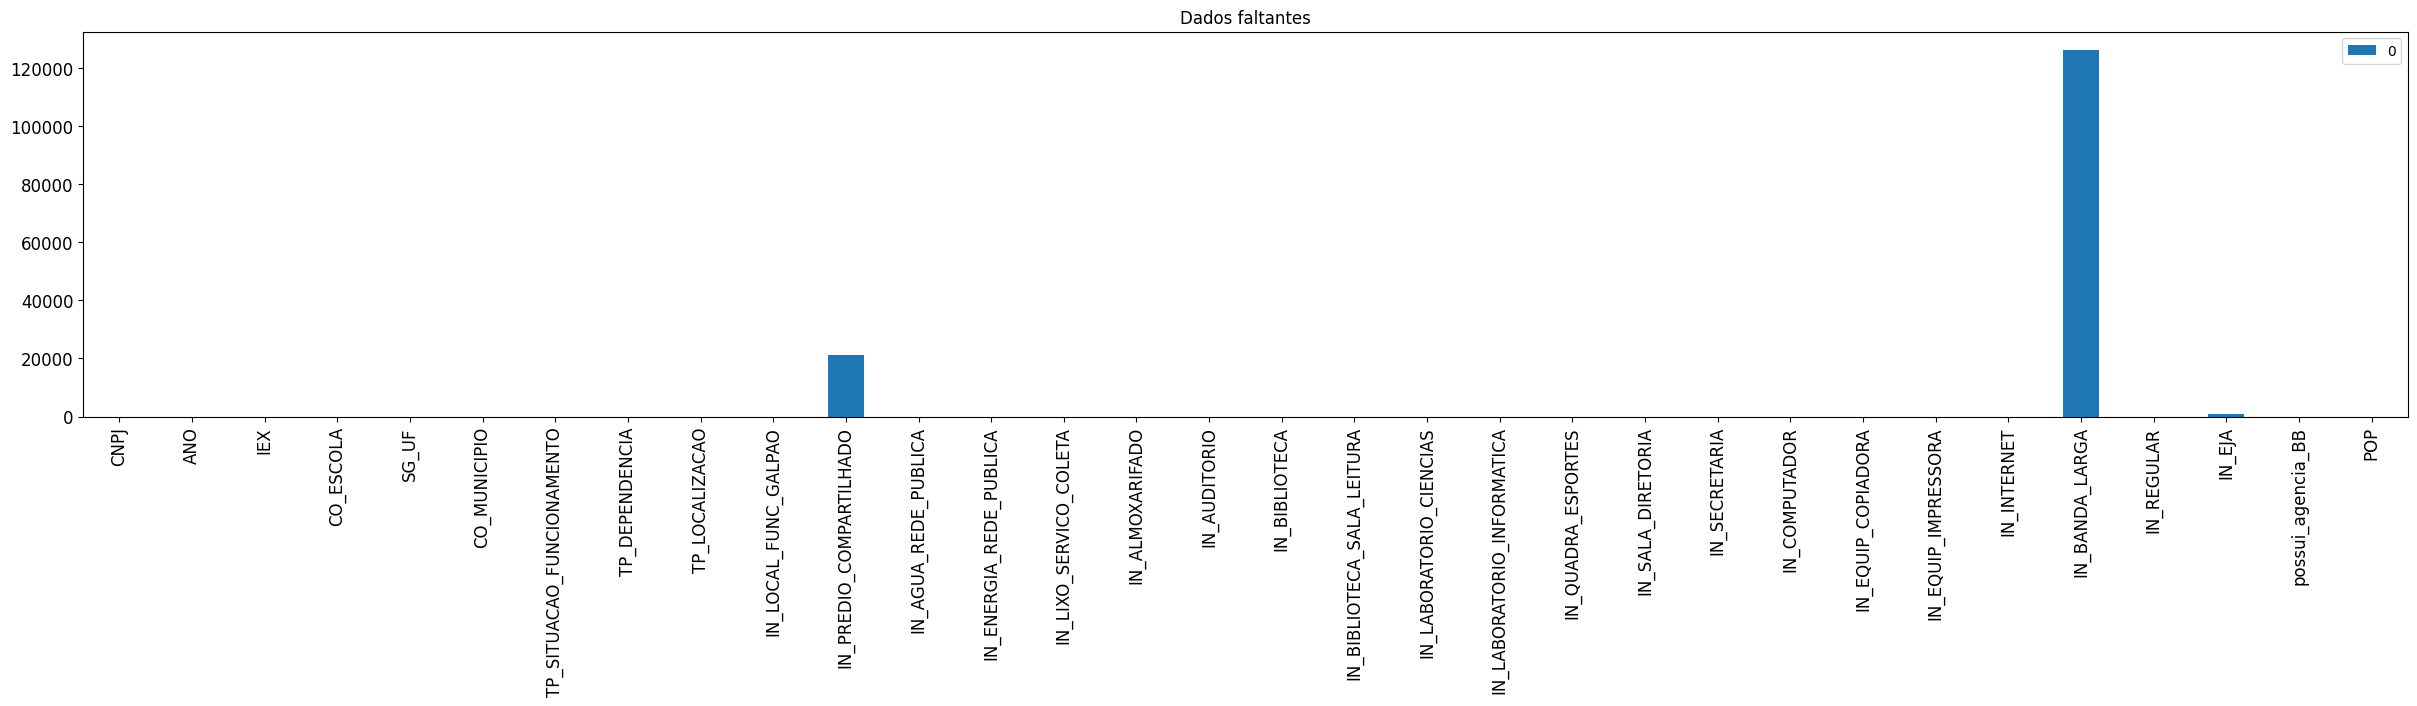

In [26]:
pd.DataFrame(merge_iex_censo_banco.isnull().sum()).plot(kind='bar',title='Dados faltantes',fontsize=12,figsize=(30,5));

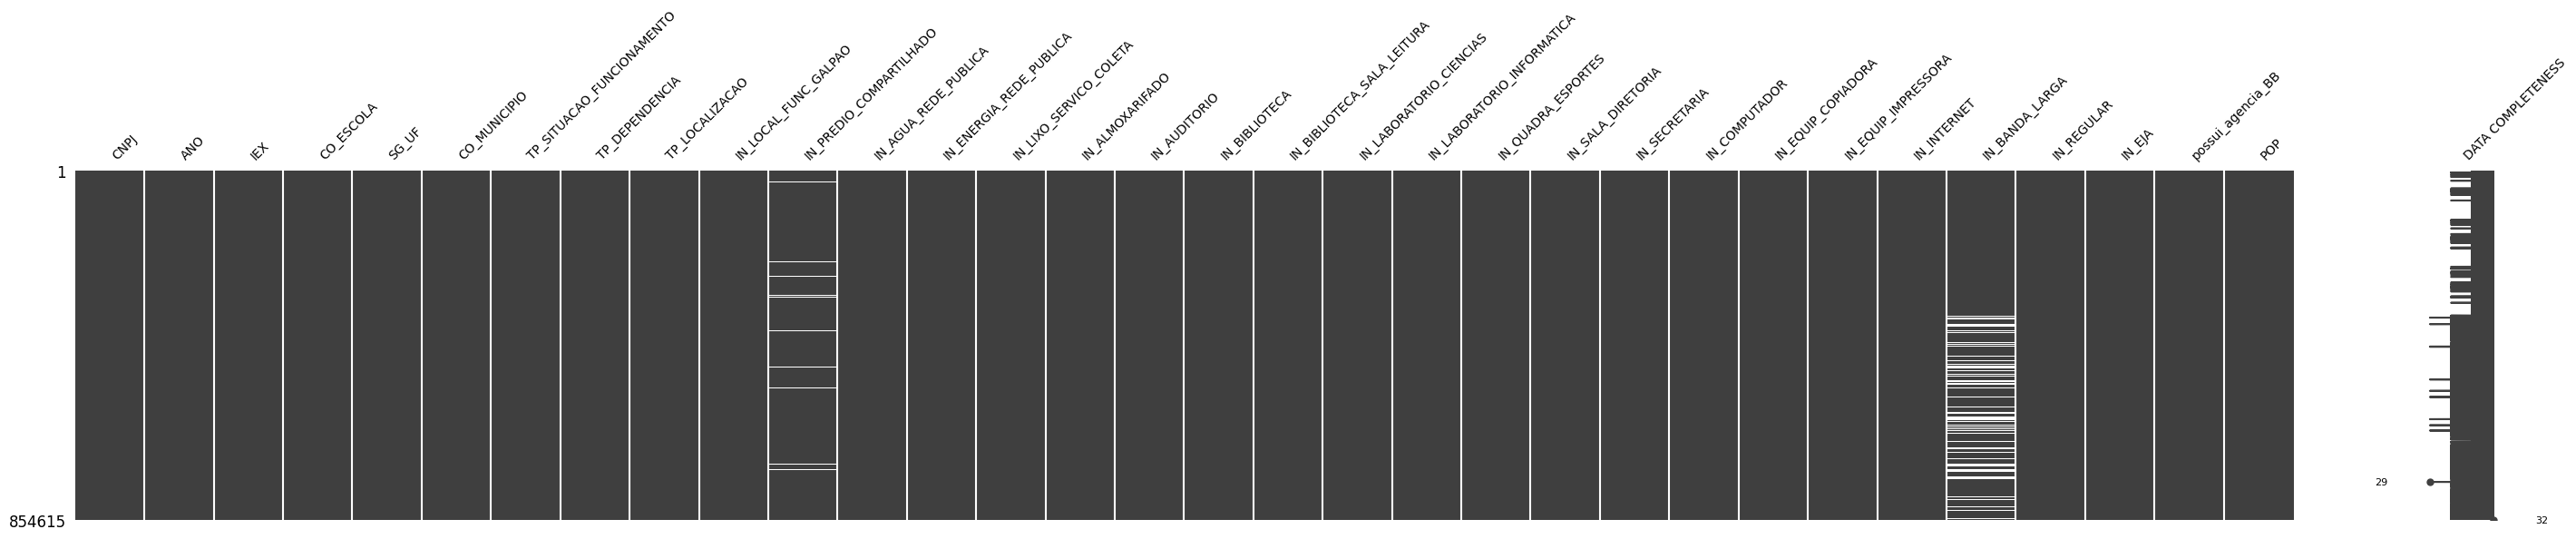

In [27]:
msno.matrix(merge_iex_censo_banco,labels=True,fontsize=10,figsize=(35,5));

In [28]:
merge_iex_censo_banco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 854615 entries, 0 to 854614
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CNPJ                        854615 non-null  int64  
 1   ANO                         854615 non-null  int64  
 2   IEX                         854615 non-null  float64
 3   CO_ESCOLA                   854615 non-null  int64  
 4   SG_UF                       854615 non-null  object 
 5   CO_MUNICIPIO                854615 non-null  int64  
 6   TP_SITUACAO_FUNCIONAMENTO   854615 non-null  int64  
 7   TP_DEPENDENCIA              854615 non-null  int64  
 8   TP_LOCALIZACAO              854615 non-null  int64  
 9   IN_LOCAL_FUNC_GALPAO        854615 non-null  float64
 10  IN_PREDIO_COMPARTILHADO     833424 non-null  float64
 11  IN_AGUA_REDE_PUBLICA        854615 non-null  float64
 12  IN_ENERGIA_REDE_PUBLICA     854615 non-null  float64
 13  IN_LIXO_SERVIC

In [29]:
merge_iex_censo_banco.isna().sum()[20:40]

IN_QUADRA_ESPORTES          0
IN_SALA_DIRETORIA           0
IN_SECRETARIA               0
IN_COMPUTADOR               0
IN_EQUIP_COPIADORA          0
IN_EQUIP_IMPRESSORA         0
IN_INTERNET                 0
IN_BANDA_LARGA         126222
IN_REGULAR                  0
IN_EJA                   1038
possui_agencia_BB           0
POP                         0
dtype: int64

In [30]:
merge_iex_censo_banco.drop(columns='IN_BANDA_LARGA',inplace=True)

In [31]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer1.fit(merge_iex_censo_banco[['IN_PREDIO_COMPARTILHADO']])
merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'] = imputer1.transform(merge_iex_censo_banco[['IN_PREDIO_COMPARTILHADO']])
imputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer2.fit(merge_iex_censo_banco[['IN_EJA']])
merge_iex_censo_banco['IN_EJA'] = imputer2.transform(merge_iex_censo_banco[['IN_EJA']])



# merge_iex_censo_banco['IN_BANDA_LARGA'] = merge_iex_censo_banco['IN_BANDA_LARGA'].fillna(pd.NA)
# merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'] = merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'].fillna(pd.NA)
# merge_iex_censo_banco['IN_EJA'] = merge_iex_censo_banco['IN_EJA'].fillna(pd.NA)

# merge_iex_censo_banco['IN_BANDA_LARGA'] = merge_iex_censo_banco['IN_BANDA_LARGA'].fillna(2)
# merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'] = merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'].fillna(2)
# merge_iex_censo_banco['IN_EJA'] = merge_iex_censo_banco['IN_EJA'].fillna(2)
# merge_iex_censo_banco['IN_BANDA_LARGA'] = merge_iex_censo_banco['IN_BANDA_LARGA'].replace(2,pd.NA)  
# merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'] = merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'].replace(2,pd.NA)
# merge_iex_censo_banco['IN_EJA'] = merge_iex_censo_banco['IN_EJA'].replace(2,pd.NA)




In [32]:
merge_iex_censo_banco.dtypes

CNPJ                            int64
ANO                             int64
IEX                           float64
CO_ESCOLA                       int64
SG_UF                          object
CO_MUNICIPIO                    int64
TP_SITUACAO_FUNCIONAMENTO       int64
TP_DEPENDENCIA                  int64
TP_LOCALIZACAO                  int64
IN_LOCAL_FUNC_GALPAO          float64
IN_PREDIO_COMPARTILHADO       float64
IN_AGUA_REDE_PUBLICA          float64
IN_ENERGIA_REDE_PUBLICA       float64
IN_LIXO_SERVICO_COLETA        float64
IN_ALMOXARIFADO               float64
IN_AUDITORIO                  float64
IN_BIBLIOTECA                 float64
IN_BIBLIOTECA_SALA_LEITURA    float64
IN_LABORATORIO_CIENCIAS       float64
IN_LABORATORIO_INFORMATICA    float64
IN_QUADRA_ESPORTES            float64
IN_SALA_DIRETORIA             float64
IN_SECRETARIA                 float64
IN_COMPUTADOR                 float64
IN_EQUIP_COPIADORA            float64
IN_EQUIP_IMPRESSORA           float64
IN_INTERNET 

In [33]:
varlist = merge_iex_censo_banco.columns[9:-2] 
# varlist =['IN_LOCAL_FUNC_GALPAO',
#        'IN_AGUA_REDE_PUBLICA', 'IN_ENERGIA_REDE_PUBLICA',
#        'IN_LIXO_SERVICO_COLETA', 'IN_ALMOXARIFADO', 'IN_AUDITORIO',
#        'IN_BIBLIOTECA', 'IN_BIBLIOTECA_SALA_LEITURA',
#        'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
#        'IN_QUADRA_ESPORTES', 'IN_SALA_DIRETORIA', 'IN_SECRETARIA',
#        'IN_COMPUTADOR', 'IN_EQUIP_COPIADORA', 'IN_EQUIP_IMPRESSORA',
#        'IN_INTERNET', 'IN_REGULAR'],
for var in varlist:
    merge_iex_censo_banco[var] = merge_iex_censo_banco[var].astype(int)

In [34]:
merge_iex_censo_banco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 854615 entries, 0 to 854614
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CNPJ                        854615 non-null  int64  
 1   ANO                         854615 non-null  int64  
 2   IEX                         854615 non-null  float64
 3   CO_ESCOLA                   854615 non-null  int64  
 4   SG_UF                       854615 non-null  object 
 5   CO_MUNICIPIO                854615 non-null  int64  
 6   TP_SITUACAO_FUNCIONAMENTO   854615 non-null  int64  
 7   TP_DEPENDENCIA              854615 non-null  int64  
 8   TP_LOCALIZACAO              854615 non-null  int64  
 9   IN_LOCAL_FUNC_GALPAO        854615 non-null  int64  
 10  IN_PREDIO_COMPARTILHADO     854615 non-null  int64  
 11  IN_AGUA_REDE_PUBLICA        854615 non-null  int64  
 12  IN_ENERGIA_REDE_PUBLICA     854615 non-null  int64  
 13  IN_LIXO_SERVIC

In [37]:
print(merge_iex_censo_banco.columns)
merge_iex_censo_banco


Index(['CNPJ', 'ANO', 'IEX', 'CO_ESCOLA', 'SG_UF', 'CO_MUNICIPIO',
       'TP_SITUACAO_FUNCIONAMENTO', 'TP_DEPENDENCIA', 'TP_LOCALIZACAO',
       'IN_LOCAL_FUNC_GALPAO', 'IN_PREDIO_COMPARTILHADO',
       'IN_AGUA_REDE_PUBLICA', 'IN_ENERGIA_REDE_PUBLICA',
       'IN_LIXO_SERVICO_COLETA', 'IN_ALMOXARIFADO', 'IN_AUDITORIO',
       'IN_BIBLIOTECA', 'IN_BIBLIOTECA_SALA_LEITURA',
       'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
       'IN_QUADRA_ESPORTES', 'IN_SALA_DIRETORIA', 'IN_SECRETARIA',
       'IN_COMPUTADOR', 'IN_EQUIP_COPIADORA', 'IN_EQUIP_IMPRESSORA',
       'IN_INTERNET', 'IN_REGULAR', 'IN_EJA', 'possui_agencia_BB', 'POP'],
      dtype='object')


,CNPJ,ANO,IEX,CO_ESCOLA,SG_UF,CO_MUNICIPIO,TP_SITUACAO_FUNCIONAMENTO,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_LOCAL_FUNC_GALPAO,...,IN_SALA_DIRETORIA,IN_SECRETARIA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_INTERNET,IN_REGULAR,IN_EJA,possui_agencia_BB,POP
0,4033254000167,2015,2.957329,12004898,AC,1200302,1,2,2,0,...,0,0,0,0,0,0,1,0,1,32385
1,4033254000167,2015,2.957329,12022373,AC,1200302,1,2,2,0,...,0,0,0,0,0,0,1,0,1,32385
2,4033254000167,2015,2.957329,12031356,AC,1200336,1,2,2,1,...,0,0,0,0,0,0,1,0,1,17173
3,4033254000167,2015,2.957329,12027480,AC,1200500,1,2,2,0,...,0,0,0,0,0,0,1,0,1,41750
4,4033254000167,2015,2.957329,12028819,AC,1200401,1,2,2,0,...,0,0,0,0,0,0,1,0,1,370550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854610,18382268000109,2021,9.785132,43004040,RS,4322400,1,3,1,0,...,1,1,1,1,1,1,1,0,1,126866
854611,18382330000154,2021,9.889496,43004555,RS,4302154,1,3,1,0,...,1,0,1,0,0,1,1,0,0,2092
854612,17964207000189,2021,9.939361,43201954,RS,4318481,1,3,1,0,...,1,1,1,1,1,1,1,0,0,4865
854613,21249243000138,2021,10.000000,43314074,RS,4314423,1,3,2,0,...,1,1,1,0,0,1,1,0,0,5738


In [38]:
merge_iex_censo_banco.drop_duplicates(inplace=True)
merge_iex_censo_banco

,CNPJ,ANO,IEX,CO_ESCOLA,SG_UF,CO_MUNICIPIO,TP_SITUACAO_FUNCIONAMENTO,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_LOCAL_FUNC_GALPAO,...,IN_SALA_DIRETORIA,IN_SECRETARIA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_INTERNET,IN_REGULAR,IN_EJA,possui_agencia_BB,POP
0,4033254000167,2015,2.957329,12004898,AC,1200302,1,2,2,0,...,0,0,0,0,0,0,1,0,1,32385
1,4033254000167,2015,2.957329,12022373,AC,1200302,1,2,2,0,...,0,0,0,0,0,0,1,0,1,32385
2,4033254000167,2015,2.957329,12031356,AC,1200336,1,2,2,1,...,0,0,0,0,0,0,1,0,1,17173
3,4033254000167,2015,2.957329,12027480,AC,1200500,1,2,2,0,...,0,0,0,0,0,0,1,0,1,41750
4,4033254000167,2015,2.957329,12028819,AC,1200401,1,2,2,0,...,0,0,0,0,0,0,1,0,1,370550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854610,18382268000109,2021,9.785132,43004040,RS,4322400,1,3,1,0,...,1,1,1,1,1,1,1,0,1,126866
854611,18382330000154,2021,9.889496,43004555,RS,4302154,1,3,1,0,...,1,0,1,0,0,1,1,0,0,2092
854612,17964207000189,2021,9.939361,43201954,RS,4318481,1,3,1,0,...,1,1,1,1,1,1,1,0,0,4865
854613,21249243000138,2021,10.000000,43314074,RS,4314423,1,3,2,0,...,1,1,1,0,0,1,1,0,0,5738


In [62]:
mapa = pd.read_csv('/home/freitas/Downloads/internet2/data/dadosmapa.csv',sep=',')
mapa.drop(columns=['Unnamed: 0','IEX'],inplace=True)
mapa.rename(columns={'CO_ENTIDADE':'CO_ESCOLA'},inplace=True)
mapa

,CO_ESCOLA,Escola,Município,lat,lon
0,11022558,EIEEF HAP BITT TUPARI,Alta Floresta D'Oeste,NaN,NaN
1,11024275,CEEJA LUIZ VAZ DE CAMOES,Alta Floresta D'Oeste,-11.930957,-61.986513
2,11024682,EEEFM EURIDICE LOPES PEDROSO,Alta Floresta D'Oeste,-11.927329,-61.995058
3,11024968,EEEMTI JUSCELINO KUBITSCHEK DE OLIVEIRA,Alta Floresta D'Oeste,-11.924601,-61.989328
4,11025620,EEEF TANCREDO DE ALMEIDA NEVES,Alta Floresta D'Oeste,-11.923917,-62.003253
...,...,...,...,...,...
167928,52049949,ESCOLA MUNICIPAL AGUA DOCE,Vila Propício,-15.380740,-48.722319
167929,52071251,ESCOLA MUNICIPAL PROFESSOR JOSE LOPES,Vila Propício,-15.449037,-48.886637
167930,52074226,ESCOLA MUNICIPAL GEDOR DE ASSUNCAO,Vila Propício,-15.210510,-48.699974
167931,52090361,CRECHE MUNICIPAL BENEDITO PEREIRA DE SIQUEIRA,Vila Propício,-15.458710,-48.887326


In [63]:
merge_iex_censo_banco_mapa = pd.merge(merge_iex_censo_banco, mapa, on = ['CO_ESCOLA'], how='left')
merge_iex_censo_banco_mapa

,CNPJ,ANO,IEX,CO_ESCOLA,SG_UF,CO_MUNICIPIO,TP_SITUACAO_FUNCIONAMENTO,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_LOCAL_FUNC_GALPAO,...,IN_EQUIP_IMPRESSORA,IN_INTERNET,IN_REGULAR,IN_EJA,possui_agencia_BB,POP,Escola,Município,lat,lon
0,4033254000167,2015,2.957329,12004898,AC,1200302,1,2,2,0,...,0,0,1,0,1,32385,ESC INDIGENA TEYU SHANENAWA,Feijó,NaN,NaN
1,4033254000167,2015,2.957329,12022373,AC,1200302,1,2,2,0,...,0,0,1,0,1,32385,ESC INDIGENA IGARAPE DO ANJO,Feijó,NaN,NaN
2,4033254000167,2015,2.957329,12031356,AC,1200336,1,2,2,1,...,0,0,1,0,1,17173,ESC INDIGENA MARIA LUCIA DA COSTA MOREIRA,Mâncio Lima,NaN,NaN
3,4033254000167,2015,2.957329,12027480,AC,1200500,1,2,2,0,...,0,0,1,0,1,41750,ESC RECIFE I,Rio Branco,NaN,NaN
4,4033254000167,2015,2.957329,12028819,AC,1200401,1,2,2,0,...,0,0,1,0,1,370550,ESC CANTO DO SABIA,Rio Branco,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854610,18382268000109,2021,9.785132,43004040,RS,4322400,1,3,1,0,...,1,1,1,0,1,126866,EMEI DO COMPLEXO ESCOLAR MARILIA SANCHOTENE FE...,Uruguaiana,-29.777030,-57.104950
854611,18382330000154,2021,9.889496,43004555,RS,4302154,1,3,1,0,...,0,1,1,0,0,2092,EMEI PRIMEIROS PASSOS,Boa Vista das Missões,NaN,NaN
854612,17964207000189,2021,9.939361,43201954,RS,4318481,1,3,1,0,...,1,1,1,0,0,4865,EMEI SONHO MEU,São José do Hortêncio,-29.524951,-51.246483
854613,21249243000138,2021,10.000000,43314074,RS,4314423,1,3,2,0,...,0,1,1,0,0,5738,ESCOLA MUNICIPAL DE EDUCACAO INFANTIL E ENSINO...,Picada Café,-29.478543,-51.160207


In [64]:
merge_iex_censo_banco_mapa.isna().sum()

CNPJ                               0
ANO                                0
IEX                                0
CO_ESCOLA                          0
SG_UF                              0
CO_MUNICIPIO                       0
TP_SITUACAO_FUNCIONAMENTO          0
TP_DEPENDENCIA                     0
TP_LOCALIZACAO                     0
IN_LOCAL_FUNC_GALPAO               0
IN_PREDIO_COMPARTILHADO            0
IN_AGUA_REDE_PUBLICA               0
IN_ENERGIA_REDE_PUBLICA            0
IN_LIXO_SERVICO_COLETA             0
IN_ALMOXARIFADO                    0
IN_AUDITORIO                       0
IN_BIBLIOTECA                      0
IN_BIBLIOTECA_SALA_LEITURA         0
IN_LABORATORIO_CIENCIAS            0
IN_LABORATORIO_INFORMATICA         0
IN_QUADRA_ESPORTES                 0
IN_SALA_DIRETORIA                  0
IN_SECRETARIA                      0
IN_COMPUTADOR                      0
IN_EQUIP_COPIADORA                 0
IN_EQUIP_IMPRESSORA                0
IN_INTERNET                        0
I

In [65]:
region = pd.read_csv('/home/freitas/Downloads/internet2/data/regioes_geograficas_composicao_por_municipios_2017_20180911(1).csv',sep=';',encoding='latin-1')
region.rename(columns={'CD_GEOCODI':'CO_MUNICIPIO','cod_rgint':'MESO_REGIAO'},inplace=True)
keep = ['CO_MUNICIPIO','MESO_REGIAO']
region = region[keep]
region

,CO_MUNICIPIO,MESO_REGIAO
0,1101104,1101
1,1100809,1101
2,1100338,1101
3,1100205,1101
4,1100106,1101
...,...,...
5565,5207907,5206
5566,5205307,5206
5567,5200605,5206
5568,5200175,5206


In [66]:
merge_iex_censo_banco_mapa_meso = pd.merge(merge_iex_censo_banco_mapa, region, on = ['CO_MUNICIPIO'], how='left')
merge_iex_censo_banco_mapa_meso

,CNPJ,ANO,IEX,CO_ESCOLA,SG_UF,CO_MUNICIPIO,TP_SITUACAO_FUNCIONAMENTO,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_LOCAL_FUNC_GALPAO,...,IN_INTERNET,IN_REGULAR,IN_EJA,possui_agencia_BB,POP,Escola,Município,lat,lon,MESO_REGIAO
0,4033254000167,2015,2.957329,12004898,AC,1200302,1,2,2,0,...,0,1,0,1,32385,ESC INDIGENA TEYU SHANENAWA,Feijó,NaN,NaN,1202
1,4033254000167,2015,2.957329,12022373,AC,1200302,1,2,2,0,...,0,1,0,1,32385,ESC INDIGENA IGARAPE DO ANJO,Feijó,NaN,NaN,1202
2,4033254000167,2015,2.957329,12031356,AC,1200336,1,2,2,1,...,0,1,0,1,17173,ESC INDIGENA MARIA LUCIA DA COSTA MOREIRA,Mâncio Lima,NaN,NaN,1202
3,4033254000167,2015,2.957329,12027480,AC,1200500,1,2,2,0,...,0,1,0,1,41750,ESC RECIFE I,Rio Branco,NaN,NaN,1201
4,4033254000167,2015,2.957329,12028819,AC,1200401,1,2,2,0,...,0,1,0,1,370550,ESC CANTO DO SABIA,Rio Branco,NaN,NaN,1201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854610,18382268000109,2021,9.785132,43004040,RS,4322400,1,3,1,0,...,1,1,0,1,126866,EMEI DO COMPLEXO ESCOLAR MARILIA SANCHOTENE FE...,Uruguaiana,-29.777030,-57.104950,4304
854611,18382330000154,2021,9.889496,43004555,RS,4302154,1,3,1,0,...,1,1,0,0,2092,EMEI PRIMEIROS PASSOS,Boa Vista das Missões,NaN,NaN,4306
854612,17964207000189,2021,9.939361,43201954,RS,4318481,1,3,1,0,...,1,1,0,0,4865,EMEI SONHO MEU,São José do Hortêncio,-29.524951,-51.246483,4301
854613,21249243000138,2021,10.000000,43314074,RS,4314423,1,3,2,0,...,1,1,0,0,5738,ESCOLA MUNICIPAL DE EDUCACAO INFANTIL E ENSINO...,Picada Café,-29.478543,-51.160207,4307


In [80]:
pib = pd.read_csv('/home/freitas/Downloads/internet2/data/pib_municipio.csv',sep=';',decimal=',')
keep= ['Código','2019']
pib = pib[keep]
pib.rename(columns={'Código':'CO_MUNICIPIO','2019':'PIB'},inplace=True)
pib


,CO_MUNICIPIO,PIB
0,1200013,144306.384222
1,1200054,52948.712702
2,1200104,258787.072748
3,1200138,89707.571294
4,1200179,87177.811671
...,...,...
5591,1721208,185161.613578
5592,1721257,30666.837119
5593,1721307,17914.210101
5594,1722081,76727.042806


In [81]:
merge_iex_censo_banco_mapa_meso_pib = pd.merge(merge_iex_censo_banco_mapa_meso, pib, on = ['CO_MUNICIPIO'], how='left')
merge_iex_censo_banco_mapa_meso_pib['PIB_per_capita'] = merge_iex_censo_banco_mapa_meso_pib['PIB']/merge_iex_censo_banco_mapa_meso_pib['POP']
merge_iex_censo_banco_mapa_meso_pib.drop(columns=['PIB'],inplace=True)
merge_iex_censo_banco_mapa_meso_pib

,CNPJ,ANO,IEX,CO_ESCOLA,SG_UF,CO_MUNICIPIO,TP_SITUACAO_FUNCIONAMENTO,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_LOCAL_FUNC_GALPAO,...,IN_REGULAR,IN_EJA,possui_agencia_BB,POP,Escola,Município,lat,lon,MESO_REGIAO,PIB_per_capita
0,4033254000167,2015,2.957329,12004898,AC,1200302,1,2,2,0,...,1,0,1,32385,ESC INDIGENA TEYU SHANENAWA,Feijó,NaN,NaN,1202,6.271941
1,4033254000167,2015,2.957329,12022373,AC,1200302,1,2,2,0,...,1,0,1,32385,ESC INDIGENA IGARAPE DO ANJO,Feijó,NaN,NaN,1202,6.271941
2,4033254000167,2015,2.957329,12031356,AC,1200336,1,2,2,1,...,1,0,1,17173,ESC INDIGENA MARIA LUCIA DA COSTA MOREIRA,Mâncio Lima,NaN,NaN,1202,6.820475
3,4033254000167,2015,2.957329,12027480,AC,1200500,1,2,2,0,...,1,0,1,41750,ESC RECIFE I,Rio Branco,NaN,NaN,1201,7.362856
4,4033254000167,2015,2.957329,12028819,AC,1200401,1,2,2,0,...,1,0,1,370550,ESC CANTO DO SABIA,Rio Branco,NaN,NaN,1201,14.040773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854610,18382268000109,2021,9.785132,43004040,RS,4322400,1,3,1,0,...,1,0,1,126866,EMEI DO COMPLEXO ESCOLAR MARILIA SANCHOTENE FE...,Uruguaiana,-29.777030,-57.104950,4304,12.940652
854611,18382330000154,2021,9.889496,43004555,RS,4302154,1,3,1,0,...,1,0,0,2092,EMEI PRIMEIROS PASSOS,Boa Vista das Missões,NaN,NaN,4306,40.088344
854612,17964207000189,2021,9.939361,43201954,RS,4318481,1,3,1,0,...,1,0,0,4865,EMEI SONHO MEU,São José do Hortêncio,-29.524951,-51.246483,4301,14.957430
854613,21249243000138,2021,10.000000,43314074,RS,4314423,1,3,2,0,...,1,0,0,5738,ESCOLA MUNICIPAL DE EDUCACAO INFANTIL E ENSINO...,Picada Café,-29.478543,-51.160207,4307,32.421220


In [82]:
merge_iex_censo_banco.to_csv('/home/freitas/Downloads/internet2/data/merge_iex_censo_meso2015-2021.csv')